<a href="https://colab.research.google.com/github/Stepeech/DataMining/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%967_%D0%A0%D0%B5%D1%88%D0%B0%D1%8E%D1%89%D0%B8%D0%B5_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *0. Ознакомиться с [блокнотом](https://colab.research.google.com/drive/1PwN8igT5w2xArBGmM6rvO9pVRQMh-FQn?usp=sharing)

# 1. Дерево решений для классификации

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

### Получение данных

Будем работать с набором данных для задачи классификации - данные по сердечно сосудистым заболеваниям, довольно стандартный набор для изучения машинного обучения, но его нет в `sklearn'e`. Поэтому скачиваем данные со стороны, с google диска.

Ссылка на google drive: https://drive.google.com/file/d/1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G


In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G' -O cardio.csv

--2023-10-12 13:37:07--  https://drive.google.com/uc?export=download&id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G
Resolving drive.google.com (drive.google.com)... 172.217.204.113, 172.217.204.100, 172.217.204.139, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lomjble2iio3i0bl2ap0k76e953986bh/1697117775000/14904333240138417226/*/1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G?e=download&uuid=703eb895-6ff5-40eb-a04e-f33d09b2be88 [following]
--2023-10-12 13:37:08--  https://doc-00-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lomjble2iio3i0bl2ap0k76e953986bh/1697117775000/14904333240138417226/*/1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G?e=download&uuid=703eb895-6ff5-40eb-a04e-f33d09b2be88
Resolving doc-00-c0-docs.googleusercontent.com (doc-00-c0-docs.googleusercontent.com)... 173.194.215.132, 

В задаче предалагается предсказать наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра. Датасет сформирован 3 групп признаков:

Объективные признаки:
- Возраст (в днях)
- Рост
- Вес
- Пол

Результаты измерения:

- Артериальное давление верхнее и нижнее
- Холестерин (три группы: норма, выше нормы, значительно выше нормы)
- Глюкоза (три группы: норма, выше нормы, значительно выше нормы)

Субъективные признаки (бинарные):

- Курение
- Употребление Алкоголя
- Физическая активность

In [ ]:
import pandas as pd
df = pd.read_csv('cardio.csv', ';')
df.head()

<ipython-input-3-334b07cf75ac>:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('cardio.csv', ';')


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
full_features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
                 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
target = 'cardio'

In [ ]:
df['age'] = round(df['age'] / 365)

## 1. Вводная

### 1.1 Сколько вопросов будет задано на первом этапе

Посчитайте, сколько вопросов задаст дерево решений в самый первый раз, если использовать все признаки из списка full_features.

In [ ]:
unique_sum = {'age': df['age'].nunique(), 'gender': df['gender'].nunique(), 'height': df['height'].nunique(), 'weight': df['weight'].nunique(), 'ap_hi': df['ap_hi'].nunique(), 'ap_lo': df['ap_lo'].nunique(),
                 'cholesterol': df['cholesterol'].nunique(), 'gluc': df['gluc'].nunique(), 'smoke': df['smoke'].nunique(), 'alco': df['alco'].nunique(), 'active': df['active'].nunique()}

num_questions = sum(unique_sum[feature] for feature in full_features)

print("Количество вопросов:", num_questions)

Количество вопросов: 748


### 1.2 Упростите задачу

Вопросов получилось достаточно, не будет моделировать столько вопросов, а попробуем уменьшить их количество.

Возьмите только два признака: weight и gluc.
А так же возьмите только 10 первых объектов.

In [ ]:
features = ['weight', 'gluc']
target = ['cardio']
df = df[features + target]
df = df.head(10)
df

,weight,gluc,cardio
0,62.0,1,0
1,85.0,1,1
2,64.0,1,1
3,82.0,1,1
4,56.0,1,0
5,67.0,2,0
6,93.0,1,0
7,95.0,3,1
8,71.0,1,0
9,68.0,1,0


### 1.3 Посчитайте еще раз, сколько будет вопросов

In [ ]:
unique_sum = {'weight': df['weight'].nunique(), 'gluc': df['gluc'].nunique()}
num_questions = sum(unique_sum[feature] for feature in features)

print("Количество вопросов:", num_questions)

Количество вопросов: 13


С таким количеством вопросов уже можем работать и разбираться в устройству дерева решений.

## 2. Устройство дерева решений

### 2.1 Обучите дерево решений

Обучите дерево решений из sklearn'a с атрибутом `random_state=1`.

In [ ]:
tree = DecisionTreeClassifier(random_state=1)


X = df[features]
y = df[target]

tree.fit(X, y)

DecisionTreeClassifier(random_state=1)

### 2.2 Отрисуйте обученное дерево решений

Нарисуйте дерево решений, которое у вас получилось после обучения. Сделайте отрисовку такой, чтобы можно было понять, какие вопросы задаются

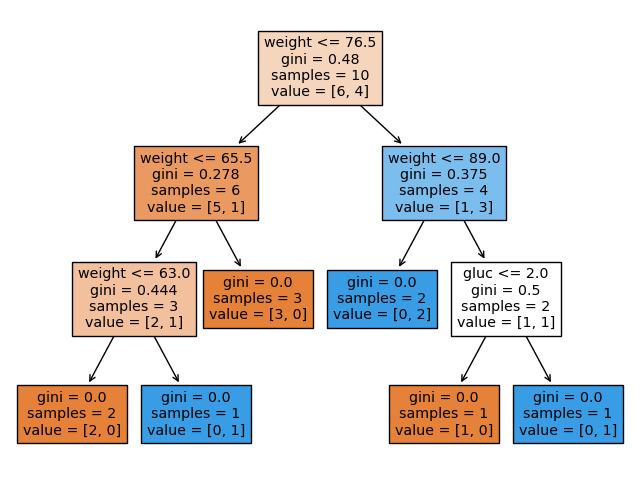

In [ ]:
plt.figure(figsize=(8, 6))
plot_tree(tree, feature_names=features, filled=True);

### 2.3 Посчитайте, сколько вершин получилось

In [ ]:
num_nodes = tree.tree_.node_count
print("Количество вершин:", num_nodes)

Количество вершин: 11


### 2.4 Посчитайте, сколько листов получилось

In [ ]:
num_leaf = tree.tree_.n_leaves
print("Количество листьев:", num_leaf)

Количество листьев: 6


### 2.5 Посмотрите, почему не получилось сделать разбиение ещё на два узла в крайнем левом узле.

В узле, где
```
gini=0.5
samples=2
value=[1, 1]
```

In [ ]:
# Ваш код/вывод здесь


## 3. Вспомогательные функции

Для того, что бы дальше сравнивать между собой объекты нужно реализовать две вспомогательные функции.

### 3.1 Функция подсчета критерия Джини

Функция должна принимать список целевых значений, считать критерий информативности и выдавать одно значение - критерий Джини.

In [ ]:
def gini(targets):
    total_samples = len(targets)
    class_counts = targets.value_counts()
    gini = 1.0

    for count in class_counts:
        probability = count / total_samples
        gini -= probability ** 2

    return gini

### 3.2 Проверка функции gini

Посчитайте критерий информативности в исходной выборке и вы должны получить точно такое же значение, как и было на визуализации дерева решений в его корне.

In [ ]:
gini_value = gini(y)
print("Критерий Джини:", gini_value)

Критерий Джини: 0.48


### 3.3 Функция подсчета прироста информации

Функция должна принимать целевые значения левой подвыборки, правой подвыборки и исходной вершины, а выдавать должна одно значение - прирост информации, подсчитанный на критерии информативности Джини.

In [ ]:
left = df[df['weight'] <= 76.5]
right = df[~(df['weight'] <= 76.5)]
parent = y
left_target = left[target]
right_target = right[target]


In [ ]:
def ig(left, right, parent):
    total_samples = len(parent)
    left_weight = len(left) / total_samples
    right_weight = len(right) / total_samples

    gini_parent = gini(parent)
    gini_left = gini(left)
    gini_right = gini(right)

    gain = gini_parent - left_weight * gini_left - right_weight * gini_right
    return gain

def ig2(data, feature, value, target):
    left_subset = data[data[feature] <= value][target]
    right_subset = data[data[feature] > value][target]
    parent_gini = gini(data[target])
    left_gini = gini(left_subset)
    right_gini = gini(right_subset)

    total_samples = len(data)
    left_weight = len(left_subset) / total_samples
    right_weight = len(right_subset) / total_samples

    gain = parent_gini - (left_weight * left_gini + right_weight * right_gini)
    return gain

In [ ]:
gain = ig(left_target, right_target, parent)
print("Прирост информации (костыли):", gain)

gain = ig2(df, feature, value, 'cardio')
print("Прирост информации:", gain)

Прирост информации (костыли): 0.16333333333333333
Прирост информации: 0.16333333333333333


Теперь вспомогательные функции готовы можем моделировать работу обученного дерева решений.

## 4. Процесс построения дерева решений

### 4.1 Получение первого вопроса


4.1.1 Пройдитесь по всем возможным вопросам для исходного набора данных


Можете сохранять полученные значения прироста информации в датафрейм в удобную для вас структуру данных.

In [ ]:
best_question = None
best_gain = -1

for feature in ['weight', 'gluc']:
    values = df[feature].unique()
    values.sort()
    for value in values:
        gain = ig2(df, feature, value, 'cardio')
        if gain > best_gain:
            best_gain = gain
            best_question = (feature, value)

4.1.2 Найдите самый лучший вопрос, опираясь на прирост информации

In [ ]:
print(f"Лучший вопрос: {best_question[0]} <= {best_question[1]}")
print(f"Прирост информации:", best_gain)

Лучший вопрос: weight <= 71.0
Прирост информации: 0.16333333333333333


4.1.3. Сделайте разбиение по этому вопросу исходных данных на две подвыборки df_left и df_right


In [ ]:
feature, value = best_question
df_left = df[df[feature] <= value]
df_right = df[df[feature] > value]

print("df_left:")
print(df_left)
print("df_right:")
print(df_right)

df_left:
   weight  gluc  cardio
0    62.0     1       0
2    64.0     1       1
4    56.0     1       0
5    67.0     2       0
8    71.0     1       0
9    68.0     1       0
df_right:
   weight  gluc  cardio
1    85.0     1       1
3    82.0     1       1
6    93.0     1       0
7    95.0     3       1


4.1.4. Проверьте себя через визуализацию дерева решений

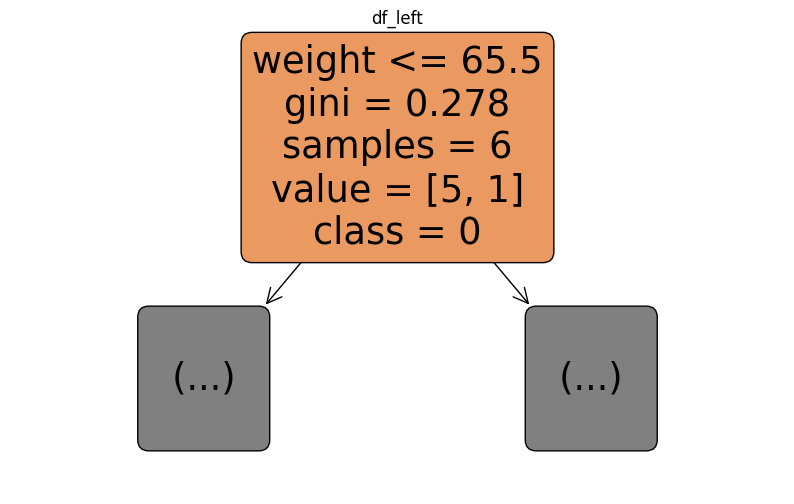

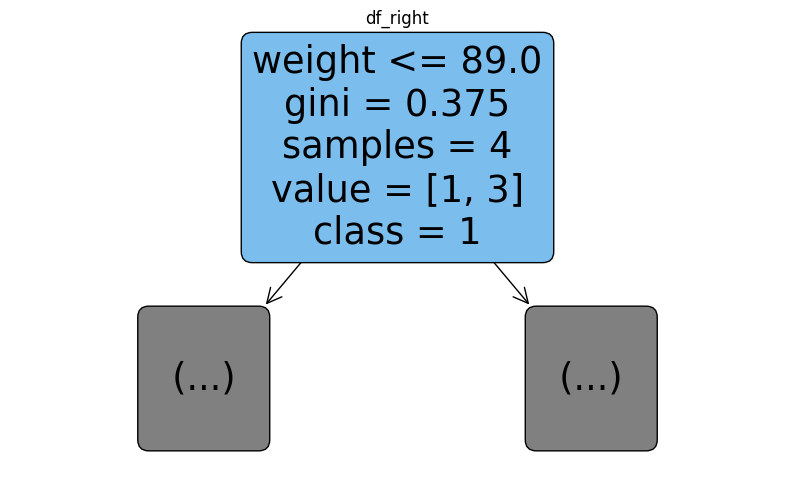

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

clf_left = DecisionTreeClassifier(random_state=1)
clf_left.fit(df_left[['weight', 'gluc']], df_left['cardio'])

plt.figure(figsize=(10, 6))
plot_tree(clf_left, feature_names=['weight', 'gluc'], class_names=['0', '1'], filled=True, rounded=True, max_depth=0)
plt.title("df_left")
plt.show()

clf_right = DecisionTreeClassifier(random_state=1)
clf_right.fit(df_right[['weight', 'gluc']], df_right['cardio'])

plt.figure(figsize=(10, 6))
plot_tree(clf_right, feature_names=['weight', 'gluc'], class_names=['0', '1'], filled=True, rounded=True, max_depth=0)
plt.title("df_right")
plt.show()

### 4.2 Получение второго вопроса


4.2.1. Глядя на df_left и df_right, посмотрите, где можно сделать ещё разбиение

4.2.2. Пройдитесь по всем признакам в выбранной подвыборке

In [ ]:
best_question_left = None
best_gain_left = -1

for feature in ['weight', 'gluc']:
    values = df_left[feature].unique()
    values.sort()
    for value in values:
        gain = ig2(df_left, feature, value, 'cardio')
        if gain > best_gain_left:
            best_gain_left = gain
            best_question_left = (feature, value)

best_question_right = None
best_gain_right = -1

for feature in ['weight', 'gluc']:
    values = df_right[feature].unique()
    values.sort()
    for value in values:
        gain = ig2(df_right, feature, value, 'cardio')
        if gain > best_gain_right:
            best_gain_right = gain
            best_question_right = (feature, value)

4.2.3 Найдите самый лучший вопрос, опираясь на прирост информации

In [ ]:
print(f"Лучший вопрос: {best_question_left[0]} <= {best_question_left[1]}")
print("Прирост информации для df_left:", best_gain_left)

print(f"Лучший вопрос: {best_question_right[0]} <= {best_question_right[1]}")
print("Прирост информации для df_right:", best_gain_right)

Лучший вопрос: weight <= 64.0
Прирост информации для df_left: 0.05555555555555544
Лучший вопрос: weight <= 85.0
Прирост информации для df_right: 0.125


4.2.4. Сделайте разбиение по этому вопросу исходных данных на две подвыборки df_left и df_right


In [ ]:
feature_left, value_left = best_question_left
df_left_left = df_left[df_left[feature_left] <= value_left]
df_left_right = df_left[df_left[feature_left] > value_left]

print("df_left_left:")
print(df_left_left)
print("df_left_right:")
print(df_left_right)

feature_right, value_right = best_question_right
df_right_left = df_right[df_right[feature_right] <= value_right]
df_right_right = df_right[df_right[feature_right] > value_right]

print("df_right_left:")
print(df_right_left)
print("df_right_right:")
print(df_right_right)

df_left_left:
   weight  gluc  cardio
0    62.0     1       0
2    64.0     1       1
4    56.0     1       0
df_left_right:
   weight  gluc  cardio
5    67.0     2       0
8    71.0     1       0
9    68.0     1       0
df_right_left:
   weight  gluc  cardio
1    85.0     1       1
3    82.0     1       1
df_right_right:
   weight  gluc  cardio
6    93.0     1       0
7    95.0     3       1


4.2.5. Проверьте себя через визуализацию дерева решений

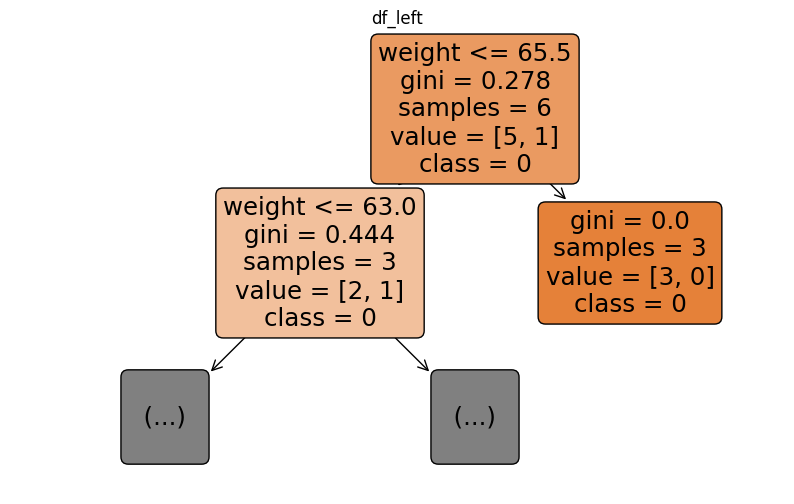

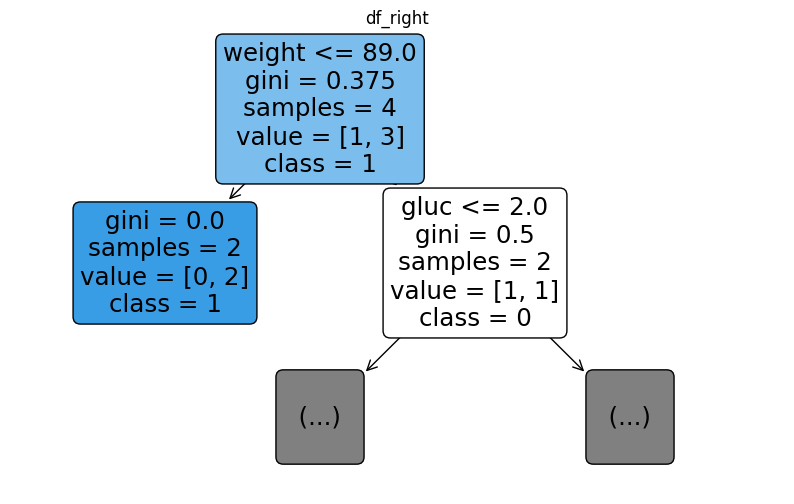

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

clf_left = DecisionTreeClassifier(random_state=1)
clf_left.fit(df_left[['weight', 'gluc']], df_left['cardio'])

plt.figure(figsize=(10, 6))
plot_tree(clf_left, feature_names=['weight', 'gluc'], class_names=['0', '1'], filled=True, rounded=True, max_depth=1)
plt.title("df_left")
plt.show()

clf_right = DecisionTreeClassifier(random_state=1)
clf_right.fit(df_right[['weight', 'gluc']], df_right['cardio'])

plt.figure(figsize=(10, 6))
plot_tree(clf_right, feature_names=['weight', 'gluc'], class_names=['0', '1'], filled=True, rounded=True, max_depth=1)
plt.title("df_right")
plt.show()

4.2.6. Если что-то не сошлось, посмотрите, в чем может быть проблема

# 2. Дерево решений для регрессии

In [1]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

### 1. Получение данных load_breat_cancer

Будем работать с набором данных для задачи регрессии `load_diabetes`, который можно получить из стандартных датасетов в `sklearn'e`.

После `load_diabetes()` возвращается словарь с данными (`data`), целевой переменной (`target`), названиями характеристик в данных (`feature_names`) и описанием данных (`DESCR`).

In [2]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
X = data.data
features = data.feature_names
y = data.target

Из признаков (характеристик данных) и целевой переменной сформируем датафрейм, в качестве названий колонок возьмем названия признаков.

In [ ]:
df = pd.DataFrame(X, columns=features)
df['target'] = y

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Разобьем выборку на две: обучающую и тестовую.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df['target'],
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((353, 10), (353,), (89, 10), (89,))

### 1.1. Обучение дерева решений

1. Инициализируйте дерево решений для задачи регрессии
2. Обучите его на обучающей выборке

### 1.2. Получение метрик качества
Узнаем, насколько дерево решений обучилось хорошо, для этого
1. Сделайте предсказания моделью для обучающей выборки
2. Сделайте предсказания моделью для тестовой выборки
3. Посчитайте метрику качества средне-квадратичная ошибка
4. Посчитайте метрику качества коэффициент детерминации

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

model = DecisionTreeRegressor(random_state=1)
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении: {mse_train:.2f}')
print(f'MSE на тесте: {mse_test:.2f}')

pd.DataFrame({
    'true': y_train,
    'pred': pred_train
})


MSE на обучении: 0.00
MSE на тесте: 5897.13


,true,pred
296,89.0,89.0
228,160.0,160.0
353,109.0,109.0
103,198.0,198.0
386,72.0,72.0
...,...,...
256,346.0,346.0
131,158.0,158.0
249,215.0,215.0
152,292.0,292.0


Сделайте вывод, насколько хорошо обучилась модель

In [ ]:
# Модель переобучена

### 1.3. Изменение метрики

Попробуйте поизменять известные параметры для того, чтобы метрика стала лучше.

In [ ]:
model = DecisionTreeRegressor(random_state=1, max_depth = 12, max_leaf_nodes = 20, min_samples_leaf = 20, min_samples_split = 5)
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении: {mse_train:.2f}')
print(f'MSE на тесте: {mse_test:.2f}')

MSE на обучении: 2779.25
MSE на тесте: 3324.27


In [ ]:
# Метрика улучшилась, но далека от идеала.

### 2. Получение данных make_regression

Для второго примера возьмем самодельный набор данных для задачи регрессии `make_regression`, который можно получить из стандартных датасетов в `sklearn'e`.

Сгенерируем себе 100к объектов, которые описываются 20 признаками, из них 12 будут дейтсвительно полезными.

In [3]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100_000, n_features=20, n_informative=12, random_state=10)

In [4]:
X.shape, y.shape

((100000, 20), (100000,))

Разобьем выборку на две: обучающую и тестовую.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80000, 20), (80000,), (20000, 20), (20000,))

### 2.1. Обучение дерева решений

1. Инициализируйте дерево решений для задачи регрессии
2. Обучите его на обучающей выборке

In [19]:
tree = DecisionTreeRegressor(random_state=1,
                             max_depth=15,
                             min_samples_leaf=1,
                             max_leaf_nodes=100)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, max_leaf_nodes=100, random_state=1)

### 2.2. Получение метрик качества
Узнаем, насколько дерево решений обучилось хорошо, для этого
1. Сделайте предсказания моделью для обучающей выборки
2. Сделайте предсказания моделью для тестовой выборки
3. Посчитайте метрику качества средне-квадратичная ошибка
4. Посчитайте метрику качества коэффициент детерминации

In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

train_predictions = tree.predict(X_train)
test_predictions = tree.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("СКО на обучении:", train_mse)
print("СКО на тесте:", test_mse)
print("Коэффициент детерминации на обучении:", train_r2)
print("Коэффициент детерминации на тесте:", test_r2)

СКО на обучении: 21899.01602779941
СКО на тесте: 22954.507997124474
Коэффициент детерминации на обучении: 0.5948161981528408
Коэффициент детерминации на тесте: 0.5748217174260459


Сделайте вывод, насколько хорошо обучилась модель

In [ ]:
# Модель недообучилась

### 2.3. Перебор гиперпараметров

Осуществите перебор параметров для получения лучших результатов (GridSearchCV, см. подход из п.0).

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [100],
    'max_leaf_nodes': [465, 470, 475]
}

tree = DecisionTreeRegressor(random_state=1)

grid_search = GridSearchCV(tree, param_grid, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

best_regressor = DecisionTreeRegressor(random_state=1, **best_params)
best_regressor.fit(X_train, y_train)

predictions = best_regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Новая СКО:", mse)

Лучшие параметры: {'max_depth': 10, 'max_leaf_nodes': 465, 'min_samples_leaf': 100, 'min_samples_split': 2}
Новая СКО: 18399.9005137945


In [ ]:
# Метрика стала лучше, но далека от идеала.